In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

## train/val/test split [70:10:20]

In [48]:
dataset_dir = "dataset/v3"

seed = 1234
batch_size = 64
image_shape = (64, 64, 3)

1. try to split into same ratio (balanced)
2. consider reading dataset as one-hot encoding (output layer, loss, imagedatasetfromdir)
3. expected test accuracy = ???
4. output can be probability
5. add healthy image 30 for each member

In [49]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_dir,
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_shape[:2],
    seed=seed,
    validation_split=0.3,
    subset="both",
)

val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2 * val_batches) // 3)
val_ds = val_ds.skip((2 * val_batches) // 3)

Found 3020 files belonging to 10 classes.
Using 2114 files for training.
Using 906 files for validation.


## Visualize Data

TypeError: only size-1 arrays can be converted to Python scalars

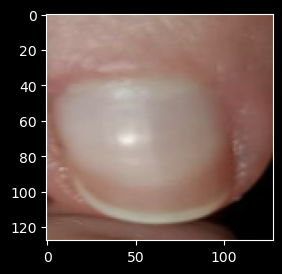

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Probably Training

In [62]:
def get_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=image_shape),

        tf.keras.layers.Rescaling(1 / 255),

        tf.keras.layers.Conv2D(16, 2, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 2, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 2, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(len(train_ds.class_names), activation="softmax"),
    ])


model = get_model()

In [63]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [64]:
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
)

Epoch 1/50
34/34 [==============================] - 3s 56ms/step - loss: 2.2760 - accuracy: 0.1381 - val_loss: 2.2519 - val_accuracy: 0.1880
Epoch 2/50
34/34 [==============================] - 2s 62ms/step - loss: 2.2081 - accuracy: 0.2077 - val_loss: 2.1594 - val_accuracy: 0.2331
Epoch 3/50
34/34 [==============================] - 2s 43ms/step - loss: 2.0603 - accuracy: 0.2815 - val_loss: 2.0666 - val_accuracy: 0.2556
Epoch 4/50
34/34 [==============================] - 2s 43ms/step - loss: 1.9319 - accuracy: 0.3193 - val_loss: 2.1639 - val_accuracy: 0.2180
Epoch 5/50
34/34 [==============================] - 2s 51ms/step - loss: 1.8996 - accuracy: 0.3434 - val_loss: 1.8811 - val_accuracy: 0.3722
Epoch 6/50
34/34 [==============================] - 2s 41ms/step - loss: 1.7578 - accuracy: 0.3964 - val_loss: 1.7111 - val_accuracy: 0.4211
Epoch 7/50
34/34 [==============================] - 2s 46ms/step - loss: 1.6200 - accuracy: 0.4499 - val_loss: 1.6364 - val_accuracy: 0.4887
Epoch 8/50
34

In [65]:
loss, accuracy = model.evaluate(test_ds, verbose=0)
print(f"{loss=:.4f}, {accuracy=:.4f}")

loss=1.3433, accuracy=0.6687
